## Calculate scaling factor to put a and b on same scale
This version runs on intcorr output from Xgremlin.
Using all lines above given SNR, regardless of identification

In [5]:
file1 = "Fe011720a.001_c.intcorr"
file2 = "Fe011720b.001_c.intcorr"
SNR = 30

 Wavenumber del_wn   A/B   SNR_b SNR_a
36277.2197  0.0006  0.5289   127  1613
36351.0334 -0.0002  0.9382    56   716
36361.8606  0.0006  0.8907   108  1349
36363.7178  0.0020  0.8437    40   504
36392.8283  0.0003  0.9022    74   918
36399.4287  0.0008  0.8961    88  1100
36443.0397  0.0017  1.1499    62   778
36453.5588  0.0005  1.2063    46   582
36491.5852  0.0004  1.2146   107  1314
36521.4249 -0.0028  1.1812    36   450
36545.8998  0.0051  1.0968    31   403
36571.2386 -0.0015  0.8033    47   555
36652.2319  0.0034  1.1172    34   402
36705.5450  0.0026  1.1794    33   404
36741.6319  0.0008  0.7544    51   596
36766.9690 -0.0021  0.5636    57   661
36829.4648  0.0022  0.2852    31   383
37174.5730  0.0021 -0.0877    32   356
37315.4162  0.0009  0.0449    48   531
37992.3693  0.0001  1.4843    98   964
37996.3557  0.0006  1.5051    95   936
38036.1671  0.0007  1.3843    74   740
38074.2044  0.0007  1.0801    98   961
38105.1620  0.0010  0.8441    36   372
38191.2836  0.0005  0.598

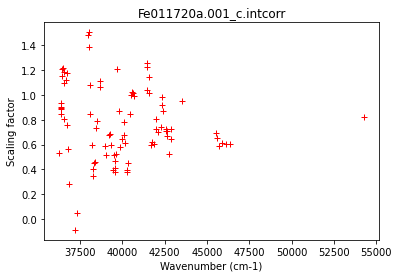

In [6]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

afile = open(file1)
bfile = open(file2)

wnum=[]
inten=[]
wnumplot = []
ratio_ab = []
snr_a = []

def reject_outliers(data):
    return data[abs(data - np.mean(data)) < 3 * np.std(data)]

for line in afile:
    line=line.split()
    if line[0].isnumeric():
        if float(line[2]) > SNR :
            wnum.append(float(line[1]))
            inten.append(float(line[5]))
            snr_a.append(float(line[2]))

            
print(" Wavenumber del_wn   A/B   SNR_b SNR_a")
for line in bfile:
    line=line.split()
    if line[0].isnumeric():
        if float(line[2])> SNR:
            wnumb = float(line[1])
            intenb = float(line[5])
            for i in wnum:
                if -0.2< wnumb-i <0.2:
                    inten_ratio = inten[wnum.index(i)]/intenb
                    wnumplot.append(wnumb)
                    ratio_ab.append(inten_ratio)
                    print( "%10.4f %7.4f %7.4f %5d %5d" % (wnumb, i-wnumb, inten_ratio, float(line[2]), snr_a[wnum.index(i)]))


data_rej = reject_outliers(np.array(ratio_ab))
print ("Mean: %6.4f Std. Dev: %6.4f from %d values; %d outliers rejected\n" % (np.mean(data_rej), np.std(data_rej), len(data_rej), len(ratio_ab)-len(data_rej) ))

fig,ax=plt.subplots()
ax.plot(wnumplot,ratio_ab,'r+')
ax.set(xlabel="Wavenumber (cm-1)",ylabel = "Scaling factor",title = file1)
plt.show()

The scatter on this plot is very large and it is not clear that this calculation is
good enough to put both sets of lines on a consistent scale. 